In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df_cluster_id                = pd.read_csv('ip_df_with_cluster.csv')
df_cluster_id                = df_cluster_id.drop(columns=['Unnamed: 0'])
df_id_attributes             = pd.read_csv('ip_df_without_noise.csv')
df_id_attributes             = df_id_attributes.drop(columns=['id'])

df_id_cluster_num_attributes = pd.concat([df_cluster_id, df_id_attributes], axis=1)
df_id_cluster_num_attributes

df_cluster_id = df_cluster_id['cluster'].unique().tolist()
len(df_cluster_id)

44

In [77]:
columns_to_sum = df_id_cluster_num_attributes.columns.tolist()
for rm_column in ['id', 'cluster', 'num_attributes']:
    columns_to_sum.remove(rm_column)

column_row_sum = '_rowsum_'
agg_map = dict(zip(columns_to_sum, ['sum']*len(columns_to_sum)))
agg_map['cluster'] = 'count'
df_groupby_cluster_id = df_id_cluster_num_attributes.groupby(['cluster']).agg(agg_map)
df_groupby_cluster_id[column_row_sum] = df_groupby_cluster_id[columns_to_sum].sum(axis=1)
df_groupby_cluster_id[columns_to_sum] = df_groupby_cluster_id[columns_to_sum].div(df_groupby_cluster_id[columns_to_sum])
df_groupby_cluster_id = df_id_cluster_num_attributes.rename({'cluster': 'count'})
df_groupby_cluster_id.reset_index(drop=True)

,id,cluster,num_attributes,Alien,Ape,Female,Male,Zombie,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,26,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,7,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,7,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,26,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,27,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,27,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,27,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
d1 = len(df_groupby_cluster_id)
d2 = 4
d3 = int(len(columns_to_sum)/d2)
heatmap_matrix = df_groupby_cluster_id[columns_to_sum].to_numpy().reshape(d1, d2, d3)
heatmap_matrix
d3

23

In [79]:
def plot_heatmap(heatmap_matrix):
    x_d = 12
    y_d = 4
    index = 0
    fig, axs = plt.subplots(x_d, y_d)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)
    for x in range(x_d):
        for y in range(y_d):
            cluster_map = heatmap_matrix[index]
            axs[x][y].imshow(cluster_map, alpha=1)
            axs[x][y].axis('off')
            index += 1
            if (index == np.size(heatmap_matrix, 0)):
                fig.show()
                return

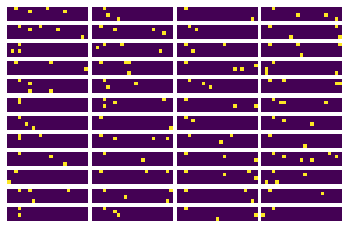

In [80]:
plot_heatmap(heatmap_matrix)
plt.show()